In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nih-chest-xrays/data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/data


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-mri-images-for-brain-tumor-detection


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("eakashgoud/liver-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/d/eakashgoud/liver-disease-dataset


In [5]:
## also uploaded all medical relations json file from func 1 and 2

In [6]:
!pip install matplotlib pandas


In [7]:
!pip install IPython

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
from IPython.display import display, Image


In [6]:
import json

with open("/kaggle/input/relations-extraction/all_medical_relations_structured_only.json", "r") as f:
    all_relations = json.load(f)

print(f"✅ Loaded {len(all_relations)} blocks of relation data.")


✅ Loaded 2 blocks of relation data.


In [7]:
organ_to_image = {
    "lung": "/kaggle/input/data/images_001/images/00000001_001.png",      # Sample chest X-ray
    "brain": "/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg",  # Brain MRI
    "liver": "/kaggle/input/d/eakashgoud/liver-disease-dataset/Benign/Benign/image/1.jpg",  # Liver image you added
    "nostril": "/kaggle/input/organ-images/nostril.png",
    "nasal": "/kaggle/input/organ-images/nasal.png",
    "nasal mucosa": "/kaggle/input/organ-images/nasal mucosa.png"
}



In [8]:
organs_from_relations = set()

for block in all_relations:
    for h, r, t in block["relations"]:
        # Check both head and tail for organ mentions
        text = (h + " " + t).lower()
        for organ in ["lung", "liver", "brain", "nostril", "nasal", "mucosa"]:
            if organ in text:
                organs_from_relations.add(organ)

print(f"✅ Found organ mentions: {organs_from_relations}")


✅ Found organ mentions: {'mucosa', 'nostril', 'brain', 'nasal', 'liver', 'lung'}


In [11]:
# Basic keyword lists for severity
critical_keywords = ["tumor", "cancer", "stroke", "infection", "failure"]
moderate_keywords = ["swelling", "pain", "bleeding", "inflammation"]
mild_keywords = ["discomfort", "itching", "dryness", "blockage"]


In [12]:
# Map to store: organ -> severity level (based on symptoms)
organ_severity_map = {}

# Loop through relations
for block in all_relations:
    for h, r, t in block["relations"]:
        combined = (h + " " + t).lower()

        for organ in ["lung", "liver", "brain", "nostril", "nasal", "mucosa"]:
            if organ in combined:
                # Now check for severity
                severity = None
                for word in critical_keywords:
                    if word in combined:
                        severity = "critical"
                        break
                if not severity:
                    for word in moderate_keywords:
                        if word in combined:
                            severity = "moderate"
                            break
                if not severity:
                    for word in mild_keywords:
                        if word in combined:
                            severity = "mild"
                            break

                # Assign the highest found severity for that organ
                existing = organ_severity_map.get(organ)
                if existing == "critical":
                    continue  # already at highest
                elif existing == "moderate" and severity == "mild":
                    continue
                else:
                    organ_severity_map[organ] = severity or "mild"


In [13]:
print("✅ Organs to highlight with severity:")
print(organ_severity_map)


✅ Organs to highlight with severity:
{'nostril': 'mild', 'nasal': 'critical', 'mucosa': 'critical', 'brain': 'critical', 'liver': 'critical', 'lung': 'critical'}


🧬 Visualizing: Nostril (Severity: mild)


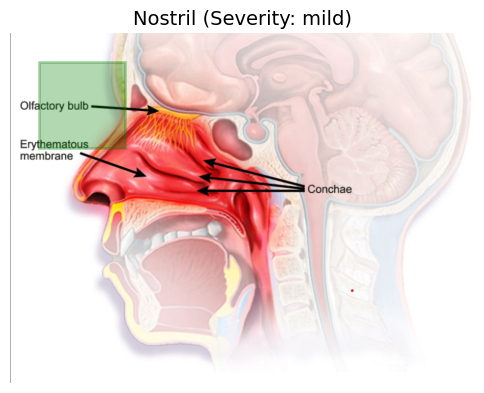

🧬 Visualizing: Nasal (Severity: critical)


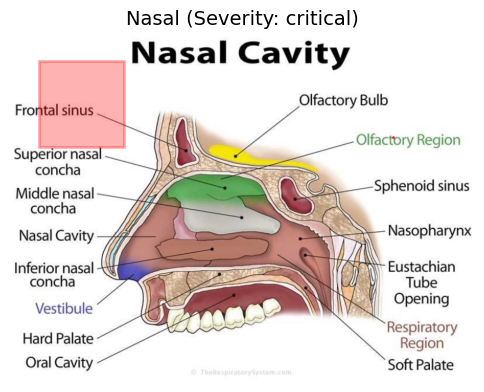

⚠️ No image found for mucosa
🧬 Visualizing: Brain (Severity: critical)


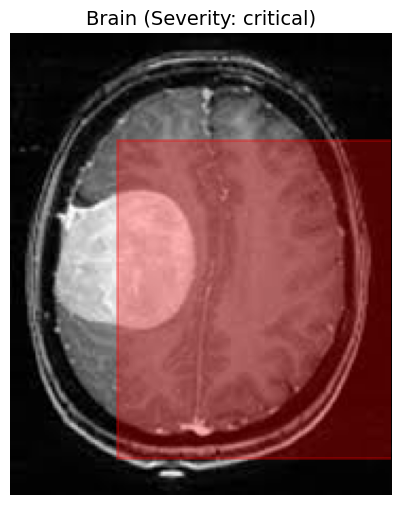

🧬 Visualizing: Liver (Severity: critical)


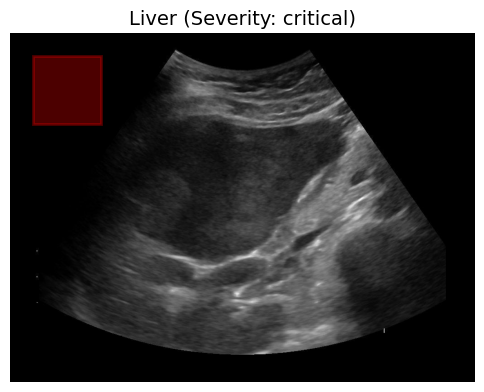

🧬 Visualizing: Lung (Severity: critical)


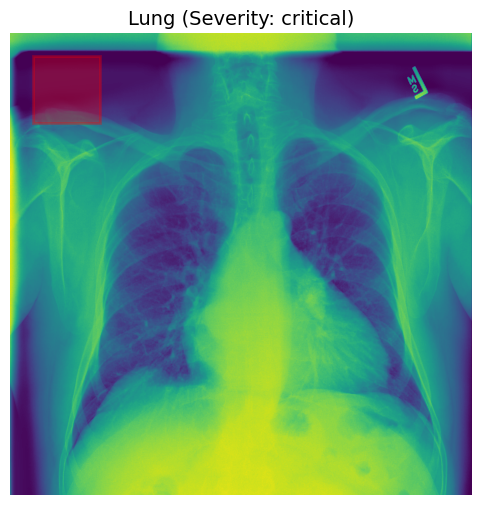

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import os

# ✅ Severity → Color map
severity_color_map = {
    "critical": "red",
    "moderate": "yellow",
    "mild": "green",
    None: "blue"
}



# ✅ Visualize each organ with its severity highlight
for organ, severity in organ_severity_map.items():
    image_path = organ_to_image.get(organ)
    highlight_color = severity_color_map.get(severity, "blue")

    if image_path and os.path.exists(image_path):
        print(f"🧬 Visualizing: {organ.capitalize()} (Severity: {severity})")

        img = mpimg.imread(image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        ax = plt.gca()

        # 📦 Draw translucent box (simulating highlight)
        rect = patches.Rectangle((50, 50), 150, 150,
                                 linewidth=2,
                                 edgecolor=highlight_color,
                                 facecolor=highlight_color,
                                 alpha=0.3)
        ax.add_patch(rect)

        plt.title(f"{organ.capitalize()} (Severity: {severity})", fontsize=14)
        plt.axis('off')
        plt.show()
    else:
        print(f"⚠️ No image found for {organ}")


In [15]:
import json
import os


output_data = []
for organ, severity in organ_severity_map.items():
    image_path = organ_to_image.get(organ)
    if image_path and os.path.exists(image_path):
        output_data.append({
            "organ": organ,
            "severity": severity,
            "image_path": image_path
        })

# 💾 Save to JSON file
output_filename = "organ_severity_output.json"
with open(output_filename, "w") as f:
    json.dump(output_data, f, indent=4)

print(f"✅ Saved organ + severity info to '{output_filename}'")


✅ Saved organ + severity info to 'organ_severity_output.json'
